In [ ]:
# # Instalar las bibliotecas necesarias
#!pip install transformers
#!pip install torch

In [ ]:
!pip install -q nlpaug transformers


In [ ]:
# Importar bibliotecas
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data_dir = '/content/drive/MyDrive/DatasetTextoUSFX'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
categorias = {
    "Reglamentos Generales Institucionales": 0,
    "Reglamentos Académicos Generales": 1,
    "Reglamentos de Becas, Convocatorias y Excelencia": 2,
    "Planes y Reglamentos de Facultad o Carrera": 3,
}

In [ ]:
import os
import pandas as pd



In [ ]:
import re
texto = '/content/drive/MyDrive/DatasetTextoUSFX/REG.-DEL-SISTEMA-DE-INVESTIGACIÓN-USFX.txt'
def limpiar_texto(texto):
    # Eliminar caracteres no deseados (ejemplo: el carácter de salto de página)
    texto = texto.replace('', '')
    # Eliminar saltos de línea
    texto = texto.replace('\n', ' ')
    # Eliminar espacios en blanco excesivos
    texto = re.sub(r'\s+', ' ', texto).strip()
    # Puedes añadir más pasos de limpieza aquí (eliminar puntuación, convertir a minúsculas, etc.)
    return texto

# Aplica esta función a cada texto en tu lista `texts` antes de tokenizar
cleaned_texts = [limpiar_texto(texto) for texto in texts]

# Luego, usa `cleaned_texts` para crear tu dataset
# train_dataset = TextoDataset(cleaned_texts, train_labels, tokenizer)
# test_dataset = TextoDataset(cleaned_texts, test_labels, tokenizer)

In [ ]:
import os
from google.colab import drive

# Montar Google Drive (si no está montado)
if not os.path.exists('/content/drive'):
    print("Google Drive no está montado. Montando Drive...")
    drive.mount('/content/drive')
else:
    print("Google Drive ya está montado.")

# Definir la ruta del directorio
data_dir = '/content/drive/MyDrive/DatasetTextoUSFX'

# Verificar si el directorio existe
if os.path.isdir(data_dir):
    print(f"Archivos .txt encontrados en '{data_dir}':")
    # Listar todos los elementos en el directorio
    for item in os.listdir(data_dir):
        # Construir la ruta completa del elemento
        item_path = os.path.join(data_dir, item)
        # Verificar si es un archivo y si termina con .txt
        if os.path.isfile(item_path) and item.lower().endswith('.txt'):
            print(item) # Imprimir solo el nombre del archivo .txt
else:
    print(f"Error: El directorio '{data_dir}' no fue encontrado. Por favor, verifica la ruta.")

Google Drive ya está montado.
Archivos .txt encontrados en '/content/drive/MyDrive/DatasetTextoUSFX':
Reglamento Específico de Sanciones Disciplinarias.txt
plan de estudios carreras sis cic dad tic.txt
Reglamento_General_Defensor_Universitario.txt
REGLAMENTO-GENERAL-DE-BECAS-SISTEMA-SEMESTRALIZADO.txt
REGLAMENTOS  DE LA FACULTAD DE ARQUITECTURA  Y CIENCIAS DEL HABITAT.txt
REGLAMENTO DEL RÉGIMEN ACADÉMICODOCENTE- ingenieria comercial.txt
HONORABLE CONSEJO UNIVERSITARIO.txt
REG.-DEL-SISTEMA-DE-INVESTIGACIÓN-USFX.txt
REGLAMENTO GENERAL GRADUACION TECNOLOGIA-2015-VERSION FINAL-1.txt
REGLAMENTO DEL RÉGIMEN ESTUDIANTIL.txt
ESTATUTO-ORGANICO-USFX-2010.txt
CONVOCATORIA_DE_BECAS_GESTION_2024_COMISION_DE_BIENESTAR.txt
convocatoria_Auxiliares _Docencia_2025.txt
REGLAMENTO DEL RÉGIMEN ESTUDIANTIL -ing comercial.txt
REGLAMENTO-ESPECIFICO-SISTEMA-ORGANIZACION-ADMINISTRATIVA.txt
Reglamento-Pgaeng-Tecnologia-Usfx-Final.txt
REGLAMENTO DE MODALIDAD DE GRADUACIÓN MEDIANTE DIPLOMADO.txt
REGLAMENTO-

In [ ]:
drive.mount('/content/drive') # This might print "Drive already mounted if run again, which is fine.

data_dir = '/content/drive/MyDrive/DatasetTextoUSFX'

# Verificar si el directorio existe
if not os.path.isdir(data_dir):
    print(f"Error: El directorio {data_dir} no fue encontrado. Por favor, verifica la ruta.")
else:
    categorias = {
        "Reglamentos Generales Institucionales": 0,
        "Reglamentos Académicos Generales": 1,
        "Reglamentos de Becas, Convocatorias y Excelencia": 2,
        "Planes y Reglamentos de Facultad o Carrera": 3,
    }

    # Inicializa listas para almacenar textos y etiquetas
    texts = []
    labels = []

    # Define la lista de archivos y sus categorías respectivas
# Define la lista de archivos y sus categorías respectivas
    archivo_categoria_map = {
        "REG.-DEL-SISTEMA-DE-INVESTIGACIÓN-USFX": "Reglamentos Generales Institucionales",
        "REGLAMENTO DEL RÉGIMEN ACADÉMICODOCENTE- ingenieria comercial": "Reglamentos Académicos Generales",
        "REGLAMENTO-GENERAL-DE-BECAS-SISTEMA-SEMESTRALIZADO": "Reglamentos de Becas, Convocatorias y Excelencia",
        "REGLAMENTOS  DE LA FACULTAD DE ARQUITECTURA  Y CIENCIAS DEL HABITAT": "Planes y Reglamentos de Facultad o Carrera",
        "Reglamento Específico de Sanciones Disciplinarias": "Reglamentos Generales Institucionales",
        "Reglamento_General_Defensor_Universitario": "Reglamentos Generales Institucionales",
        "plan de estudios carreras sis cic dad tic": "Planes y Reglamentos de Facultad o Carrera",
        "REGLAMENTO DE MODALIDAD DE GRADUACIÓN MEDIANTE DIPLOMADO": "Reglamentos Académicos Generales",
        "REGLAMENTO-ESPECIFICO-SISTEMA-ORGANIZACION-ADMINISTRATIVA": "Reglamentos Generales Institucionales",
        "convocatoria_Auxiliares _Docencia_2025": "Reglamentos de Becas, Convocatorias y Excelencia",
        "Reglamento-Pgaeng-Tecnologia-Usfx-Final": "Planes y Reglamentos de Facultad o Carrera",
        "HONORABLE CONSEJO UNIVERSITARIO": "Reglamentos Generales Institucionales",
        "CONVOCATORIA_DE_BECAS_GESTION_2024_COMISION_DE_BIENESTAR": "Reglamentos de Becas, Convocatorias y Excelencia",
        "REGLAMENTO DEL RÉGIMEN ESTUDIANTIL -ing comercial": "Reglamentos Académicos Generales",
        "ESTATUTO-ORGANICO-USFX-2010": "Reglamentos Generales Institucionales",
        "REGLAMENTO-DEL-REGIMEN": "Reglamentos Generales Institucionales",
        "REGLAMENTO GENERAL GRADUACION TECNOLOGIA-2015-VERSION FINAL-1": "Reglamentos Académicos Generales",
        "REGLAMENTO DEL RÉGIMEN ESTUDIANTIL": "Reglamentos Académicos Generales",
        "REGLAMENTO DE MODALIDAD": "Reglamentos Académicos Generales",
        "REGLAMENTO EXCELENCIA ACADÉMICA (BECA ESTUDIO)": "Reglamentos de Becas, Convocatorias y Excelencia",
        "plan estrategico institucional usfx": "Reglamentos Generales Institucionales",
        "REG.-DE-LA-CARRERA-DEL-DOCENTE-INVESTIGADOR-USFX": "Reglamentos Generales Institucionales",
        "Conjunto de Reglamentos FACULTAD DE CIENCIAS Y TECNOLOGIA": "Planes y Reglamentos de Facultad o Carrera",
    }

    # **Define la función de limpieza de texto**
    import re
    def limpiar_texto(texto):
        # Eliminar caracteres no deseados (ejemplo: el carácter de salto de página)
        texto = texto.replace('', '')
        # Eliminar saltos de línea
        texto = texto.replace('\n', ' ')
        # Eliminar espacios en blanco excesivos
        texto = re.sub(r'\s+', ' ', texto).strip()
        # Puedes añadir más pasos de limpieza aquí (eliminar puntuación, convertir a minúsculas, etc.)
        return texto

    # Read each file and assign its numerical category
    for archivo, categoria in archivo_categoria_map.items():
        file_path = os.path.join(data_dir, archivo + ".txt")
        # Check if the file exists before trying to open it
        if not os.path.exists(file_path):
            print(f"Advertencia: El archivo {file_path} no fue encontrado y será omitido.")
            continue # Skip to the next file if not found

        try:
            # Try reading with UTF-8
            with open(file_path, 'r', encoding='utf-8') as f:
                texto_leido = f.read()
                # **Aplicar la función de limpieza al texto leído**
                texto_limpio = limpiar_texto(texto_leido)
                texts.append(texto_limpio) # Añadir el texto limpio a la lista
                labels.append(categorias[categoria])  # Assign the numerical category
        except UnicodeDecodeError:
            # If a decoding error occurs, try with ISO-8859-1
            try:
                with open(file_path, 'r', encoding='ISO-8859-1') as f:
                    texto_leido = f.read()
                    # **Aplicar la función de limpieza al texto leído**
                    texto_limpio = limpiar_texto(texto_leido)
                    texts.append(texto_limpio) # Añadir el texto limpio a la lista
                    labels.append(categorias[categoria])  # Assign the numerical category
            except Exception as e:
                # Catch any other errors during file reading
                print(f"Error al leer el archivo {file_path} con ambas codificaciones: {e}")

    # Create the final DataFrame
    df = pd.DataFrame({'texts': texts, 'labels': labels})

    # Visualize the first rows
    print(df.head(23)) # Use print() for output in Colab notebooks

# Continue with the rest of your code for tokenization, model loading, etc.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                                texts  labels
0   UNIVERSIDAD MAYOR, REAL Y PONTIFICIA DE SAN FR...       0
1   REGLAMENTO DEL RÉGIMEN ACADÉMICODOCENTE Art.1º...       1
2   ﻿REGLAMENTO GENERAL DE BECAS SISTEMA SEMESTRAL...       2
3   REGLAMENTOS DE LA FACULTAD DE ARQUITECTURA Y C...       3
4   ﻿UNIVERSIDAD MAYOR, REAL Y PONTIFICIA DE SAN F...       0
5   UNIVERSIDAD DE SEVILLA SECRETARÍA GENERAL Norm...       0
6   **Carrera: INGENIERÍA EN TECNOLOGÍAS DE LA INF...       3
7   REGLAMENTO DE MODALIDAD DE GRADUACIÓN MEDIANTE...       1
8   REGLAMENTO ESPECIFICO DEL SISTEMA DE ORGANIZAC...       0
9   RESOLUCION DECANAL Nº 007/2025 CONSIDERANDO: Q...       2
10  1 REGLAMENTO DEL PROGRAMA DE GRADUACION DE ANT...       3
11  Universidad Mayor, Real y Pontificia de San Fr...       0
12  BIENESTAR SOCIAL ESTUDIANTIL CONVOCATORIA GENE...       2
13 

In [ ]:
# Dividir en conjuntos de entrenamiento y prueba
train_texts, test_texts, train_labels, test_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42
)

In [ ]:
# Definir la clase personalizada para el dataset
class TextoDataset(Dataset):
    def __init__(self, textos, etiquetas, tokenizer, max_length=512):
        self.textos = textos
        self.etiquetas = etiquetas
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.textos)

    def __getitem__(self, idx):
        texto = self.textos[idx]
        etiqueta = self.etiquetas[idx]
        encoding = self.tokenizer(
            texto, padding='max_length', truncation=True, max_length=self.max_length, return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(etiqueta, dtype=torch.long)
        }

In [ ]:

tokenizer = BertTokenizer.from_pretrained('dccuchile/bert-base-spanish-wwm-cased')
#Carga un tokenizador preentrenado basado en el modelo bert-base-uncased.

train_dataset = TextoDataset(train_texts, train_labels, tokenizer)
test_dataset = TextoDataset(test_texts, test_labels, tokenizer)

 modelo bert 12 capas

In [ ]:
# Crear DataLoaders
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Cargar el modelo BERT para clasificación
#model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=4)
model = BertForSequenceClassification.from_pretrained('dccuchile/bert-base-spanish-wwm-cased', num_labels=4) # <-- Cambiado aquí


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


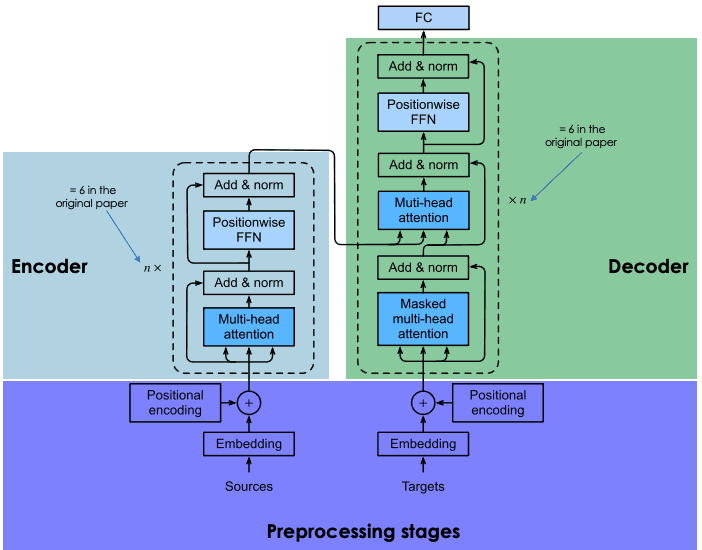

In [ ]:
# Mover el modelo a la GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(31002, 768, padding_idx=1)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
# Definir el optimizador y la función de pérdida
optimizer = AdamW(model.parameters(), lr=2e-5)
criterion = CrossEntropyLoss()#funcion de perdida

In [ ]:
# Función de entrenamiento manual
def train(model, train_loader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader, desc="Entrenando"):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

In [ ]:
# Función de evaluación manual
def evaluate(model, test_loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Evaluando"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    accuracy = correct / total
    return total_loss / len(test_loader), accuracy

In [ ]:
for batch in train_loader:
    print(batch.keys())
    break

dict_keys(['input_ids', 'attention_mask', 'labels'])


In [ ]:
# Entrenamiento y evaluación manual
num_epochs = 50
for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    train_loss = train(model, train_loader, optimizer, criterion, device)
    test_loss, test_accuracy = evaluate(model, test_loader, criterion, device)
    print(f"Pérdida de entrenamiento: {train_loss:.4f}")
    print(f"Pérdida de prueba: {test_loss:.4f}, Precisión en prueba: {test_accuracy:.4f}")


Epoch 1/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]


Pérdida de entrenamiento: 0.0332
Pérdida de prueba: 1.3947, Precisión en prueba: 0.4000

Epoch 2/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]


Pérdida de entrenamiento: 0.0378
Pérdida de prueba: 1.4341, Precisión en prueba: 0.4000

Epoch 3/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]


Pérdida de entrenamiento: 0.0288
Pérdida de prueba: 1.4699, Precisión en prueba: 0.4000

Epoch 4/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]


Pérdida de entrenamiento: 0.0268
Pérdida de prueba: 1.5057, Precisión en prueba: 0.4000

Epoch 5/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


Pérdida de entrenamiento: 0.0255
Pérdida de prueba: 1.5357, Precisión en prueba: 0.4000

Epoch 6/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]


Pérdida de entrenamiento: 0.0236
Pérdida de prueba: 1.5592, Precisión en prueba: 0.4000

Epoch 7/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]


Pérdida de entrenamiento: 0.0249
Pérdida de prueba: 1.5781, Precisión en prueba: 0.4000

Epoch 8/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]


Pérdida de entrenamiento: 0.0197
Pérdida de prueba: 1.5906, Precisión en prueba: 0.4000

Epoch 9/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]


Pérdida de entrenamiento: 0.0208
Pérdida de prueba: 1.6014, Precisión en prueba: 0.4000

Epoch 10/50


Evaluando: 100%|██████████| 1/1 [00:01<00:00,  1.87s/it]


Pérdida de entrenamiento: 0.0193
Pérdida de prueba: 1.6111, Precisión en prueba: 0.4000

Epoch 11/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]


Pérdida de entrenamiento: 0.0193
Pérdida de prueba: 1.6228, Precisión en prueba: 0.4000

Epoch 12/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]


Pérdida de entrenamiento: 0.0189
Pérdida de prueba: 1.6362, Precisión en prueba: 0.4000

Epoch 13/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


Pérdida de entrenamiento: 0.0178
Pérdida de prueba: 1.6484, Precisión en prueba: 0.4000

Epoch 14/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]


Pérdida de entrenamiento: 0.0162
Pérdida de prueba: 1.6584, Precisión en prueba: 0.4000

Epoch 15/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]


Pérdida de entrenamiento: 0.0158
Pérdida de prueba: 1.6663, Precisión en prueba: 0.4000

Epoch 16/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


Pérdida de entrenamiento: 0.0151
Pérdida de prueba: 1.6718, Precisión en prueba: 0.4000

Epoch 17/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]


Pérdida de entrenamiento: 0.0144
Pérdida de prueba: 1.6758, Precisión en prueba: 0.4000

Epoch 18/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


Pérdida de entrenamiento: 0.0138
Pérdida de prueba: 1.6813, Precisión en prueba: 0.4000

Epoch 19/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]


Pérdida de entrenamiento: 0.0145
Pérdida de prueba: 1.6893, Precisión en prueba: 0.4000

Epoch 20/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]


Pérdida de entrenamiento: 0.0128
Pérdida de prueba: 1.6992, Precisión en prueba: 0.4000

Epoch 21/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]


Pérdida de entrenamiento: 0.0126
Pérdida de prueba: 1.7087, Precisión en prueba: 0.4000

Epoch 22/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]


Pérdida de entrenamiento: 0.0117
Pérdida de prueba: 1.7190, Precisión en prueba: 0.4000

Epoch 23/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]


Pérdida de entrenamiento: 0.0119
Pérdida de prueba: 1.7284, Precisión en prueba: 0.4000

Epoch 24/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]


Pérdida de entrenamiento: 0.0117
Pérdida de prueba: 1.7375, Precisión en prueba: 0.4000

Epoch 25/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


Pérdida de entrenamiento: 0.0114
Pérdida de prueba: 1.7481, Precisión en prueba: 0.4000

Epoch 26/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]


Pérdida de entrenamiento: 0.0120
Pérdida de prueba: 1.7599, Precisión en prueba: 0.4000

Epoch 27/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]


Pérdida de entrenamiento: 0.0122
Pérdida de prueba: 1.7732, Precisión en prueba: 0.4000

Epoch 28/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]


Pérdida de entrenamiento: 0.0110
Pérdida de prueba: 1.7872, Precisión en prueba: 0.4000

Epoch 29/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]


Pérdida de entrenamiento: 0.0097
Pérdida de prueba: 1.7984, Precisión en prueba: 0.4000

Epoch 30/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]


Pérdida de entrenamiento: 0.0105
Pérdida de prueba: 1.8110, Precisión en prueba: 0.4000

Epoch 31/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]


Pérdida de entrenamiento: 0.0105
Pérdida de prueba: 1.8265, Precisión en prueba: 0.4000

Epoch 32/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]


Pérdida de entrenamiento: 0.0104
Pérdida de prueba: 1.8412, Precisión en prueba: 0.4000

Epoch 33/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]


Pérdida de entrenamiento: 0.0091
Pérdida de prueba: 1.8547, Precisión en prueba: 0.4000

Epoch 34/50


Evaluando: 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]


Pérdida de entrenamiento: 0.0088
Pérdida de prueba: 1.8637, Precisión en prueba: 0.4000

Epoch 35/50


Evaluando: 100%|██████████| 1/1 [00:02<00:00,  2.61s/it]


Pérdida de entrenamiento: 0.0088
Pérdida de prueba: 1.8704, Precisión en prueba: 0.4000

Epoch 36/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


Pérdida de entrenamiento: 0.0092
Pérdida de prueba: 1.8740, Precisión en prueba: 0.4000

Epoch 37/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]


Pérdida de entrenamiento: 0.0079
Pérdida de prueba: 1.8751, Precisión en prueba: 0.4000

Epoch 38/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]


Pérdida de entrenamiento: 0.0085
Pérdida de prueba: 1.8756, Precisión en prueba: 0.4000

Epoch 39/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


Pérdida de entrenamiento: 0.0076
Pérdida de prueba: 1.8789, Precisión en prueba: 0.4000

Epoch 40/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]


Pérdida de entrenamiento: 0.0079
Pérdida de prueba: 1.8908, Precisión en prueba: 0.4000

Epoch 41/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]


Pérdida de entrenamiento: 0.0077
Pérdida de prueba: 1.9169, Precisión en prueba: 0.4000

Epoch 42/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]


Pérdida de entrenamiento: 0.0077
Pérdida de prueba: 1.9383, Precisión en prueba: 0.4000

Epoch 43/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]


Pérdida de entrenamiento: 0.0073
Pérdida de prueba: 1.9562, Precisión en prueba: 0.4000

Epoch 44/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


Pérdida de entrenamiento: 0.0076
Pérdida de prueba: 1.9694, Precisión en prueba: 0.4000

Epoch 45/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


Pérdida de entrenamiento: 0.0074
Pérdida de prueba: 1.9780, Precisión en prueba: 0.4000

Epoch 46/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


Pérdida de entrenamiento: 0.0070
Pérdida de prueba: 1.9856, Precisión en prueba: 0.4000

Epoch 47/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


Pérdida de entrenamiento: 0.0069
Pérdida de prueba: 1.9927, Precisión en prueba: 0.4000

Epoch 48/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]


Pérdida de entrenamiento: 0.0074
Pérdida de prueba: 1.9990, Precisión en prueba: 0.4000

Epoch 49/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


Pérdida de entrenamiento: 0.0072
Pérdida de prueba: 2.0051, Precisión en prueba: 0.4000

Epoch 50/50


Evaluando: 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

Pérdida de entrenamiento: 0.0066
Pérdida de prueba: 2.0094, Precisión en prueba: 0.4000


In [ ]:
# Definir las clases
# CLASES = {
#     0: "Estudiantes",
#     1: "Docentes",
#     2: "Administrativos",
#     3: "General"
# }
def inferir_clase(texto, model_path, tokenizer_path, max_length=512):

    # Cargar el tokenizador y el modelo
    tokenizer = BertTokenizer.from_pretrained(tokenizer_path)
    model = BertForSequenceClassification.from_pretrained(model_path)

    # Mover el modelo a la GPU si está disponible
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    # Tokenizar el texto
    encoding = tokenizer(
        texto,
        padding='max_length',
        truncation=True,
        max_length=max_length,
        return_tensors='pt'
    )

    # Mover los tensores al dispositivo adecuado
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    # Realizar la inferencia
    model.eval()
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        prediccion = torch.argmax(logits, dim=1).item()

    # Devolver la clase predicha
    #return categorias[prediccion]
    return prediccion

In [ ]:
#Guardar el modelo entrenado (opcional)
model.save_pretrained('/content/drive/MyDrive/DatasetTextoUSFX/bert_model_manual')
tokenizer.save_pretrained('/content/drive/MyDrive/DatasetTextoUSFX/bert_tokenizer_manual')

('/content/drive/MyDrive/DatasetTextoUSFX/bert_tokenizer_manual/tokenizer_config.json',
 '/content/drive/MyDrive/DatasetTextoUSFX/bert_tokenizer_manual/special_tokens_map.json',
 '/content/drive/MyDrive/DatasetTextoUSFX/bert_tokenizer_manual/vocab.txt',
 '/content/drive/MyDrive/DatasetTextoUSFX/bert_tokenizer_manual/added_tokens.json')

In [ ]:
model_path = '/content/drive/MyDrive/DatasetTextoUSFX/bert_model_manual'
tokenizer_path = '/content/drive/MyDrive/DatasetTextoUSFX/bert_tokenizer_manual'
texto_ejemplo = "Artículo 1. La Universidad Mayor Real y Pontificia de San Francisco Xavier de Chuquisaca, fundada el 27 de marzo de 1624, es una persona jurídica de Derecho Público y una Institución Nacional de Estudios Superiores, que goza de autonomía académica, económica, administrativa, financiera y funcional, conforme al artículo 92 de la Constitución Política del Estado"

clase_predicha = inferir_clase(texto_ejemplo, model_path, tokenizer_path)
print(f"El texto pertenece a la clase: {clase_predicha}")

El texto pertenece a la clase: 0


In [ ]:
texto_ejemplo2 = "**Curso: 1** 1. FIS100, FÍSICA BÁSICA I, Sin requisitos   2. MAT100, ÁLGEBRA I, Sin requisitos   3. MAT101, CÁLCULO I, Sin requisitos "
clase_predicha2 = inferir_clase(texto_ejemplo2, model_path, tokenizer_path)
print(f"El texto pertenece a la clase: {clase_predicha2}")

El texto pertenece a la clase: 3


In [ ]:
texto_ejemplo3 = "1.- El presente reglamento tiene por finalidad establecer normas y procedimientos que promuevan la investigación y el desarrollo de la ciencia y la tecnología para presentar alternativas de solución a los problemas  del hábitat de nuestra región y del país"
clase_predicha3 = inferir_clase(texto_ejemplo3, model_path, tokenizer_path)
print(f"El texto pertenece a la clase: {clase_predicha3}")

El texto pertenece a la clase: 0


In [ ]:
!pip install -q nlpaug
!pip install -q nlpaug transformers




In [ ]:
import nlpaug.augmenter.word as naw
import os
import torch
import random
import torch.nn as nn

from transformers import AutoTokenizer, AutoModel

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
from nlpaug.augmenter.word import SynonymAug

syn_aug = SynonymAug(aug_p=0.3, lang='es')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import torch
from torch.optim import AdamW

In [ ]:


# Configuración
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")
MAX_LENGTH = 256
BATCH_SIZE = 8
EPOCHS = 10
EARLY_STOPPING_PATIENCE = 2

# Dataset
class TextoDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=MAX_LENGTH):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        inputs = self.tokenizer(text, return_tensors="pt", padding="max_length", truncation=True, max_length=self.max_len)
        return {
            "input_ids": inputs["input_ids"].squeeze(0),
            "attention_mask": inputs["attention_mask"].squeeze(0),
            "label": torch.tensor(label, dtype=torch.long)
        }

# Modelo
class BERTClassifier(nn.Module):
    def __init__(self, num_labels):
        super(BERTClassifier, self).__init__()
        self.bert = AutoModel.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")
        self.dropout = nn.Dropout(0.3)
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        return self.classifier(pooled_output)

#bt_aug = naw.BackTranslationAug(from_model_name='facebook/wmt19-en-es', to_model_name='facebook/wmt19-es-en')
bt_aug = naw.BackTranslationAug(from_model_name='Helsinki-NLP/opus-mt-en-es', to_model_name='Helsinki-NLP/opus-mt-es-en')
def augment_text(text, n=1):
    augmented_texts = []
    for _ in range(n):
        try:
            aug_text = bt_aug.augment(text)
        except:
            aug_text = text
        augmented_texts.append(aug_text)
    return augmented_texts

# Cargar textos desde archivos
data_folder = '/content/drive/MyDrive/DatasetTextoUSFX'
#data_dir = '/content/drive/MyDrive/DatasetTextoUSFX'
texts = df['text'].tolist()
labels = df['label'].tolist()
etiquetas = {"estudiantes": 0, "docentes": 1, "administrativos": 2, "general": 3}

for filename in os.listdir(data_folder):
    for key, value in etiquetas.items():
        if key in filename.lower():
            with open(os.path.join(data_folder, filename), "r", encoding="latin-1") as f:

                text = f.read()


                texts.append(text)
                labels.append(value)
            break

# División y aumento de datos
#train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2, random_state=42, stratify=labels)
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2, random_state=42, stratify=labels)
# Aplicar augmentación (opcionalmente solo si hay pocos datos por clase)
aug_texts, aug_labels = [], []
for text, label in zip(train_texts, train_labels):
    augmented = augment_text(text, n=2)  # Puedes ajustar `n`
    aug_texts.extend(augmented)
    aug_labels.extend([label] * len(augmented))

train_texts += aug_texts
train_labels += aug_labels

# DataLoaders
train_dataset = TextoDataset(train_texts, train_labels, tokenizer)
val_dataset = TextoDataset(val_texts, val_labels, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

# Entrenamiento con EarlyStopping

model = BERTClassifier(num_labels=len(etiquetas)).to(device)
optimizer = AdamW(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()

best_val_loss = float("inf")
patience_counter = 0

for epoch in range(EPOCHS):
    start = time.time()
    model.train()
    total_train_loss = 0
    for batch in train_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)

    # Validación
    model.eval()
    total_val_loss = 0
    predictions, true_labels = [], []
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["label"].to(device)

            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            preds = torch.argmax(outputs, dim=1)
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = accuracy_score(true_labels, predictions)

    print(f"Época {epoch+1}: 🟢 Loss train: {avg_train_loss:.4f} | 🔵 Loss val: {avg_val_loss:.4f} | 🎯 Val Acc: {val_accuracy:.4f} | ⏱️ Tiempo: {time.time()-start:.2f}s")

    # Early stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
        torch.save(model.state_dict(), "/content/drive/MyDrive/DatasetTextoUSFX/mejor_modelo.pt")
    else:
        patience_counter += 1
        if patience_counter >= EARLY_STOPPING_PATIENCE:
            print("⏹️ Early stopping activado.")
            break


Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Época 1: 🟢 Loss train: 1.3384 | 🔵 Loss val: 1.3256 | 🎯 Val Acc: 0.3333 | ⏱️ Tiempo: 4.01s
Época 2: 🟢 Loss train: 1.0317 | 🔵 Loss val: 1.2742 | 🎯 Val Acc: 0.5000 | ⏱️ Tiempo: 3.82s
Época 3: 🟢 Loss train: 0.7903 | 🔵 Loss val: 1.2400 | 🎯 Val Acc: 0.5000 | ⏱️ Tiempo: 4.14s
Época 4: 🟢 Loss train: 0.5648 | 🔵 Loss val: 1.2972 | 🎯 Val Acc: 0.5000 | ⏱️ Tiempo: 3.90s
Época 5: 🟢 Loss train: 0.3782 | 🔵 Loss val: 1.2752 | 🎯 Val Acc: 0.5000 | ⏱️ Tiempo: 3.79s
⏹️ Early stopping activado.


In [ ]:

# Crear instancia y cargar los pesos entrenados
modelo_inferencia = BERTClassifier(num_labels=num_labels)
modelo_inferencia.load_state_dict(torch.load('/content/drive/MyDrive/DatasetTextoUSFX/mejor_modelo.pt', map_location=device))
modelo_inferencia.eval()
modelo_inferencia.to(device)

# Función para hacer inferencia
def inferir_clase(texto):
    inputs = tokenizer(texto, return_tensors="pt", padding="max_length", truncation=True, max_length=256)
    input_ids = inputs["input_ids"].to(device)
    attention_mask = inputs["attention_mask"].to(device)
    with torch.no_grad():
        outputs = modelo_inferencia(input_ids, attention_mask)
        pred_label = torch.argmax(outputs, dim=1).item()
    return pred_label

# Ejemplo
ejemplo6 = "El reglamento del régimen estudiantil regula las actividades y derechos de los estudiantes."
clase_predicha6 = inferir_clase(ejemplo6)
print(f"🔍 El texto pertenece a la clase: {clase_predicha6}")

NameError: name 'BERTClassifier' is not defined

   
## "Reglamentos Generales Institucionales": 0,
## "Reglamentos Académicos Generales": 1,
##"Reglamentos de Becas, Convocatorias y Excelencia": 2,
##"Planes y Reglamentos de Facultad o Carrera": 3,
    

In [ ]:
ejemplo1 = "El reglamento general de las becas establece los requisitos para la postulación y selección de los beneficiarios."
clase_predicha1 = inferir_clase(ejemplo1)
print(f"🔍 El texto pertenece a la clase: {clase_predicha1}")

ejemplo2 = "Los reglamentos de la facultad de arquitectura y ciencias del hábitat definen las normas para los proyectos y evaluaciones."
clase_predicha2 = inferir_clase(ejemplo2)
print(f"🔍 El texto pertenece a la clase: {clase_predicha2}")

ejemplo3 = "El estatuto orgánico de la Universidad especifica las funciones y responsabilidades de la comunidad universitaria."
clase_predicha3 = inferir_clase(ejemplo3)
print(f"🔍 El texto pertenece a la clase: {clase_predicha3}")

ejemplo4 = "El reglamento de modalidad de graduación mediante diplomado describe los pasos y requisitos necesarios."
clase_predicha4 = inferir_clase(ejemplo4)
print(f"🔍 El texto pertenece a la clase: {clase_predicha4}")

ejemplo5 = "El reglamento específico de sanciones disciplinarias contempla las infracciones y las sanciones correspondientes."
clase_predicha5 = inferir_clase(ejemplo5)
print(f"🔍 El texto pertenece a la clase: {clase_predicha5}")

ejemplo6 = "El reglamento del régimen estudiantil regula las actividades y derechos de los estudiantes."
clase_predicha6 = inferir_clase(ejemplo6)
print(f"🔍 El texto pertenece a la clase: {clase_predicha6}")

ejemplo7 = "El conjunto de reglamentos de la facultad de ciencias y tecnología describe las normas académicas y administrativas."
clase_predicha7 = inferir_clase(ejemplo7)
print(f"🔍 El texto pertenece a la clase: {clase_predicha7}")

🔍 El texto pertenece a la clase: 0
🔍 El texto pertenece a la clase: 0
🔍 El texto pertenece a la clase: 0
🔍 El texto pertenece a la clase: 0
🔍 El texto pertenece a la clase: 0
🔍 El texto pertenece a la clase: 0
🔍 El texto pertenece a la clase: 0


In [ ]:
# Ejemplo
texto_ejemplo = "las becas son una ayuda económica que se otorga a estudiantes para apoyar sus estudios y fomentar la excelencia académica."
clase_predicha = inferir_clase(texto_ejemplo)
print(f"🔍 El texto pertenece a la clase: {clase_predicha}")

NameError: name 'inferir_clase' is not defined

In [ ]:
# Ejemplo
texto_ejemplo = "FIS100, FÍSICA BÁSICA I, Sin requisitos   2. MAT100, ÁLGEBRA I, Sin requisitos   3. MAT101, CÁLCULO I, Sin requisitos"
clase_predicha = inferir_clase(texto_ejemplo)
print(f"🔍 El texto pertenece a la clase: {clase_predicha}")

🔍 El texto pertenece a la clase: 0


In [ ]:
ejemplo1 = "El reglamento  de las becas establece los requisitos para la postulación y selección de los beneficiarios."
clase_predicha1 = inferir_clase(ejemplo1)
print(f"🔍 El texto pertenece a la clase: {clase_predicha1}")


🔍 El texto pertenece a la clase: 0


In [ ]:
ejemplo2 = "Los reglamentos de la facultad de arquitectura y ciencias del hábitat definen las normas para los proyectos y evaluaciones."
clase_predicha2 = inferir_clase(ejemplo2)
print(f"🔍 El texto pertenece a la clase: {clase_predicha2}")


🔍 El texto pertenece a la clase: 0


In [ ]:
ejemplo3 = "El estatuto orgánico de la Universidad especifica las funciones y responsabilidades de la comunidad universitaria."
clase_predicha3 = inferir_clase(ejemplo3)
print(f"🔍 El texto pertenece a la clase: {clase_predicha3}")


🔍 El texto pertenece a la clase: 0
